   position             team  played   won  drawn  lost  goals_for  \
0         1         Valencia      30  18.0    7.0   5.0      0.041   
1         2        Barcelona      30  19.0    5.0   6.0      0.050   
2         3  Atlético Madrid      30  17.0    8.0   5.0      0.051   
3         4      Real Madrid      30  17.0    7.0   6.0      0.046   
4         5  Atlético Bilbao      30  14.0    7.0   9.0      0.040   

   goals_against  goal_difference     points  year  
0          0.019            0.022  47.777778  1970  
1          0.022            0.028  47.777778  1970  
2          0.020            0.031  46.666667  1970  
3          0.024            0.022  45.555556  1970  
4          0.031            0.009  38.888889  1970  
(178, 11)
position             int64
team                object
played               int64
won                float64
drawn              float64
lost               float64
goals_for          float64
goals_against      float64
goal_difference    float64
points  

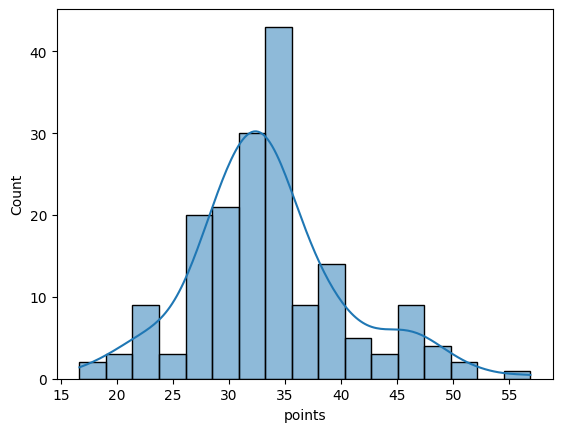

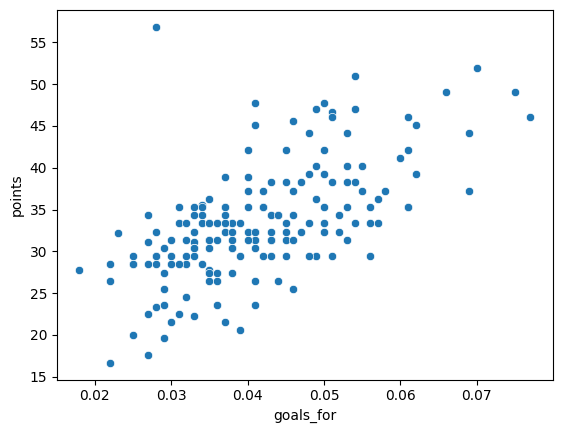

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

la_liga = pd.read_csv("../normalized_data/1970-1980.csv")




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()




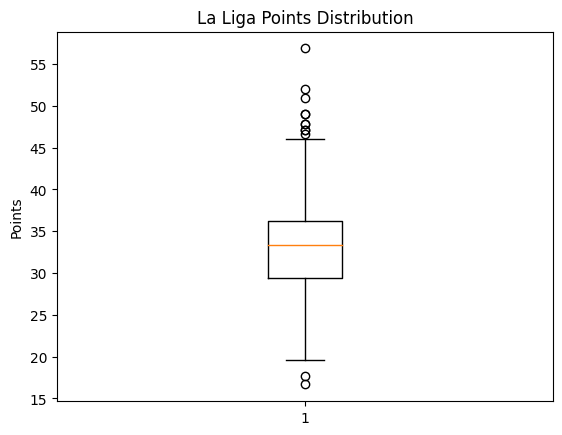

Outliers:
     position             team  played        won      drawn       lost  \
0           1         Valencia      30  18.000000   7.000000   5.000000   
1           2        Barcelona      30  19.000000   5.000000   6.000000   
2           3  Atlético Madrid      30  17.000000   8.000000   5.000000   
15         16         Zaragoza      30   3.000000   9.000000  18.000000   
34          1  Atlético Madrid      30  17.647059   7.058824   5.294118   
52          1        Barcelona      30  18.529412   7.058824   4.411765   
70          1      Real Madrid      30  17.647059   8.823529   3.529412   
88          1      Real Madrid      30  17.647059   7.058824   5.294118   
123        18           Málaga      30   5.294118   5.294118  19.411765   
160         1      Real Madrid      30  19.411765   7.941176   2.647059   
161         2    Real Sociedad      30  16.764706  12.352941   0.882353   
177        18           Málaga      30   7.058824   5.294118  17.647059   

     goals_for

In [3]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

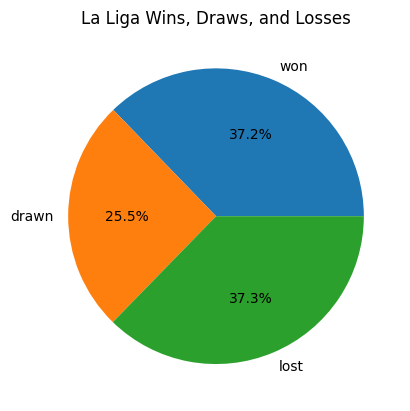

In [4]:
arr=[]
year1=1970
year2=1971
while(year1!=1980):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']
plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

C:\Users\Sneha\AppData\Local\Temp\ipykernel_30948\728096091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_df = la_liga.groupby('team').sum()


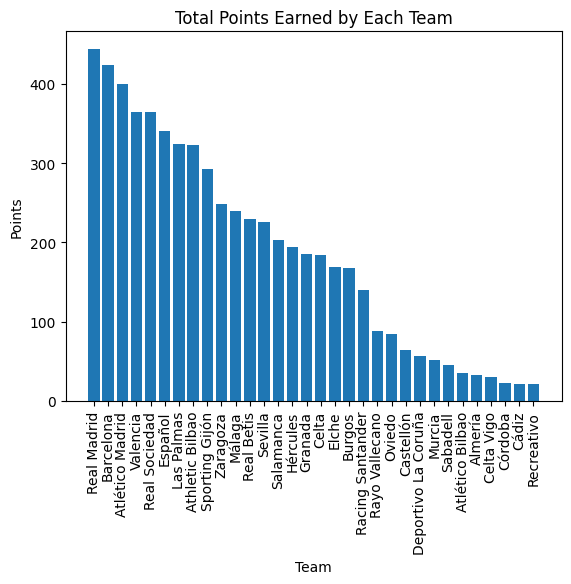

In [5]:

team_df = la_liga.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

